<a href="https://colab.research.google.com/github/aakarshit-py/aakarshit-py/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **# DECISION TREE CLASSIFIER:**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import  load_iris

In [12]:
iris=load_iris()      #in the form of array
iris

In [16]:
df=sns.load_dataset('iris')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [17]:
# independent ann dependent features
x=df.iloc[:,:-1]
y= iris.target    #why iris.target? bcs in our array dataset target column is alreay encoded in
                    #  numerical values but in dataframe it is like setosa etc toh hume wo encode krna padta

In [18]:
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
#train test split
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.33, random_state=42)

In [21]:
x_train.shape

(100, 4)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
#BY default its a post prunning bcs jo bh parametes by default hote hai wo none hote hai ya based no post prunning hote hai
tree_model=DecisionTreeClassifier()
#so according to sklearn decison tree classifier  as we can see wo dont provide any parameter so it will consider default paramteres
#and it will further work based on  ginni impurity and if we want to exceute entropy parameter we should have to
# pass that paramter manually

In [24]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

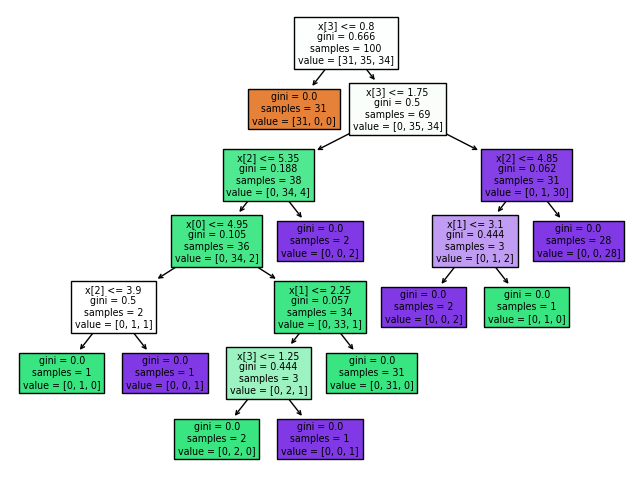

In [29]:
from sklearn import tree
plt.figure(figsize=(8,6))
tree.plot_tree(tree_model, filled=True)
plt.show()

Basically the ginni impurty value vary from 0 to 0.5 and we can see in our tree model the child nodes gini values are between 0-0.5
In 4th level of decision tree we can see [0,32,2] there is a huge difference in ratio so we can neglect 2, we can stop our tree here by providing(max_depth)
bcs there is no need to separate further because it will leads to overfitting
which will decrease our model accuracy

In [32]:
y_pred=tree_model.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score, classification_report

In [34]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.96

In [35]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



# Now create a New Model using max_depth to reduce the distribution of Decison Tree


In [36]:
new_model=DecisionTreeClassifier(max_depth=2)

In [37]:
new_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [38]:
y_pred_new=new_model.predict(x_test)

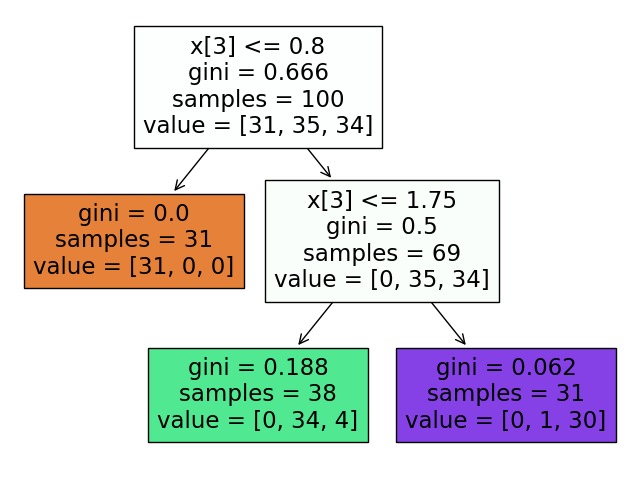

In [55]:
plt.figure(figsize=(8,6))
tree.plot_tree(new_model,filled=True)
plt.show()

In [40]:
new_accuracy=accuracy_score(y_pred_new,y_test)
new_accuracy

0.98

In [41]:
new_classification_report=classification_report(y_pred_new,y_test)
print(new_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# *CONCLUSION*

In [45]:
print('Accuracy without providing parameter in DecisionTreeClassifier:- ',accuracy)
print('Accuracy with providing parameter(max_depth):-',new_accuracy)

Accuracy without providing parameter in DecisionTreeClassifier:-  0.96
Accuracy with providing parameter(max_depth):- 0.98


In [52]:
print('Classificaiton Report without providing parameter in DecisionTreeClassifier:- ', end='\n')
print(classification_report(y_pred,y_test))
print( ' ')
print( ' ')
print('Classificaiton Report with providing parameter(max_depth):-',end='\n')
print(new_classification_report)

Classificaiton Report without providing parameter in DecisionTreeClassifier:- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

 
 
Classificaiton Report with providing parameter(max_depth):-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

